<a href="https://colab.research.google.com/github/outinletter/DataAnalysis/blob/main/%EA%B8%B8%EB%B2%97_IT_%EC%A0%84%EB%AC%B8%EC%84%9C%2C_%EB%AA%A8%EB%91%90%EC%9D%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_with_%ED%8C%8C%EC%9D%B4%EC%8D%AC(~46%EA%B0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [모두의 인공지능 with 파이썬] UNIT 01 인공지능 개념 이해하기
> https://www.youtube.com/watch?v=ggPvBsdPlF8&list=PLa9dKeCAyr7iXpGqNHKXmeqB6LLo7ieS9

## Unit 05 인공 신경망의 신호 전달 원리2
> https://www.youtube.com/watch?v=6et7547YdNk&list=PLRtkynNyEsXnu5XCR_sd37GQJ3ODlE4bU&index=11&ab_channel=%EA%B8%B8%EB%B2%97_IT%EC%A0%84%EB%AC%B8%EC%84%9C

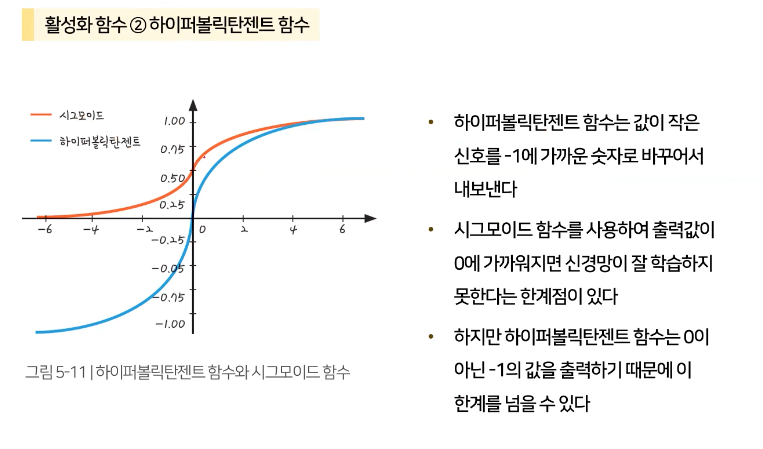

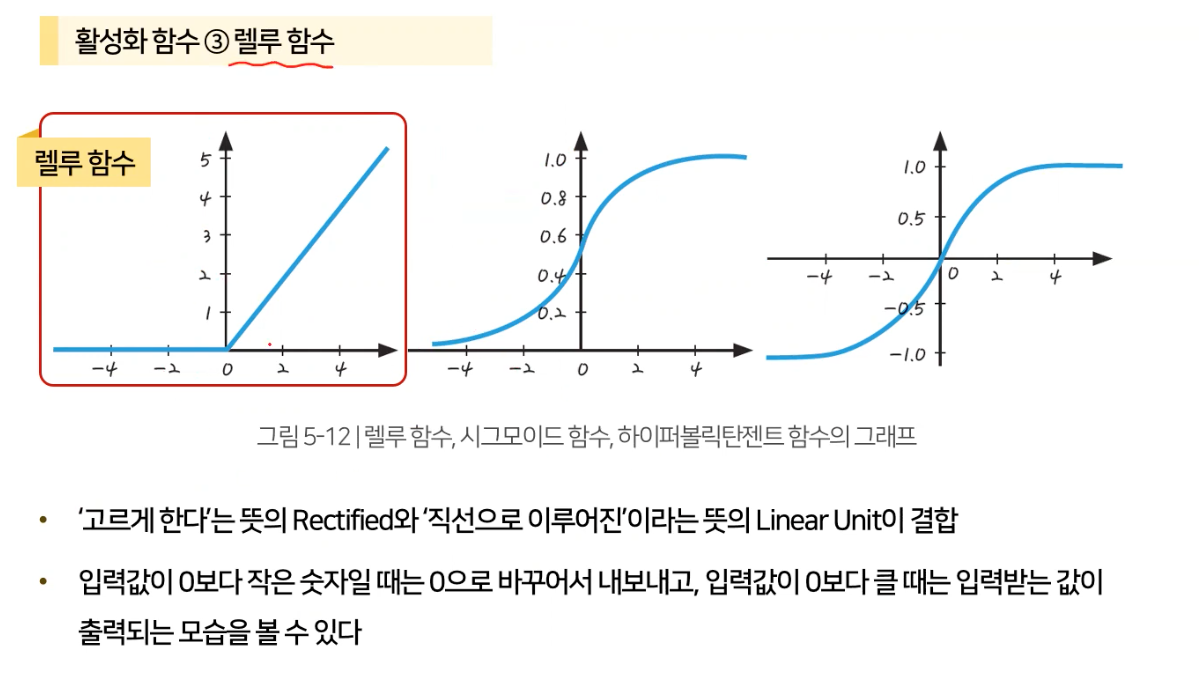

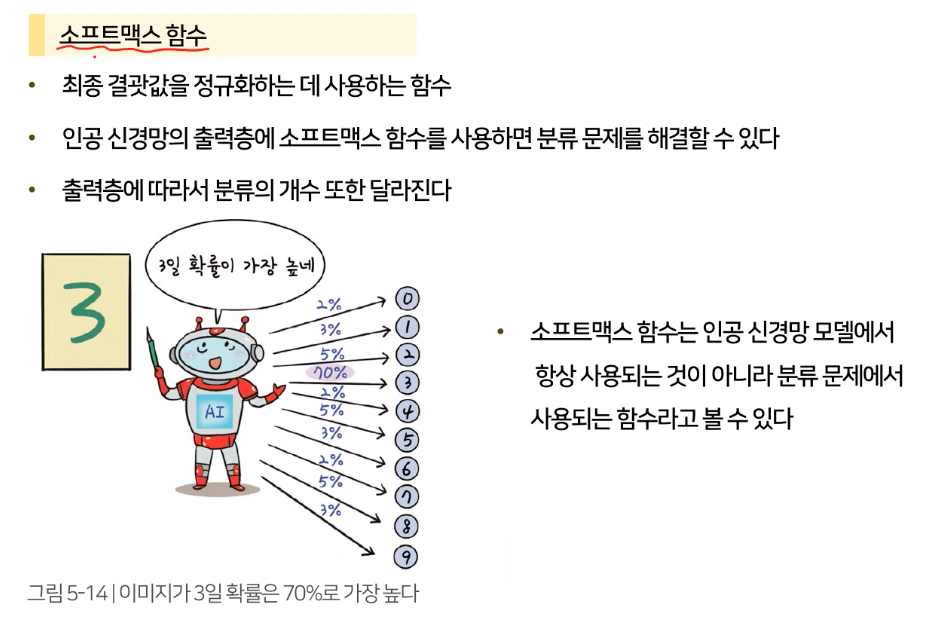

## UNIT 16-3 숫자 인식 인공지능 만들기 (mnist X데이터 전처리하기)
> https://www.youtube.com/watch?v=0fzsOixjDLA&list=PLa9dKeCAyr7iXpGqNHKXmeqB6LLo7ieS9&index=32&ab_channel=%EA%B8%B8%EB%B2%97IT%EC%A0%84%EB%AC%B8%EC%84%9C%28%EC%97%85%EB%A1%9C%EB%93%9C%EC%A4%91%EB%8B%A8%2C%EA%B5%AC%EA%B3%84%EC%A0%95%29

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical # 0~9사이에 있는 숫자 이미지를 구별하는  인공지능, 원핫인코딩
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# 정답이 있는 데이터(y_trian, y_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
# 정규화하기 위해 데이터를 0~1사이의 값으로 바꿈(실수형)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train/= 255
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape ", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape  (10000, 784)


In [ ]:
# 10개의 범주형 데이터로 변환(one-hot-encoding)
# (6000,) -> (6000, 10)
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [ ]:
# 모델을 시퀀셜 방식으로 개발
model = Sequential()

# 모델에 층을 추가
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_______________________________________________

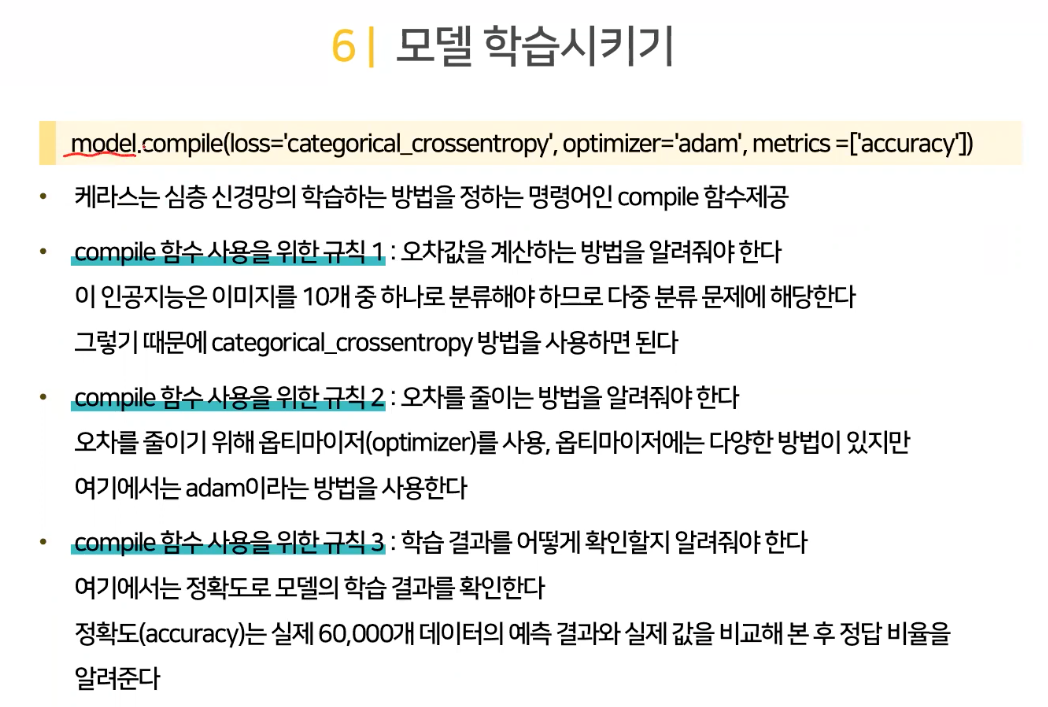

> verbose 값
- 0 : 아무런 표시를 하지 않음
- 1 : 에포크별 진행 사항을 알려줌
- 2 : 에포크별 학습 결과를 알려줌

In [ ]:
# 모델 학습시키기
# adam : 오차를 줄이는 위해 옵티마이저 사용(다양한 경사하강법 중 adam이라는 방법 사용)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2249 - accuracy: 0.9337
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0825 - accuracy: 0.9745
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0514 - accuracy: 0.9840
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0364 - accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0176 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0139 - accura

In [ ]:
# evaluate : 모델의 정확도를 측정하는 함수
# Y_test : 테스트할 데이터의 정답
score = model.evaluate(X_test, Y_test)
print('Test Score : ', score[0])
print('Test Accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0809 - accuracy: 0.9809
Test Score :  0.08090689778327942
Test Accuracy :  0.98089998960495


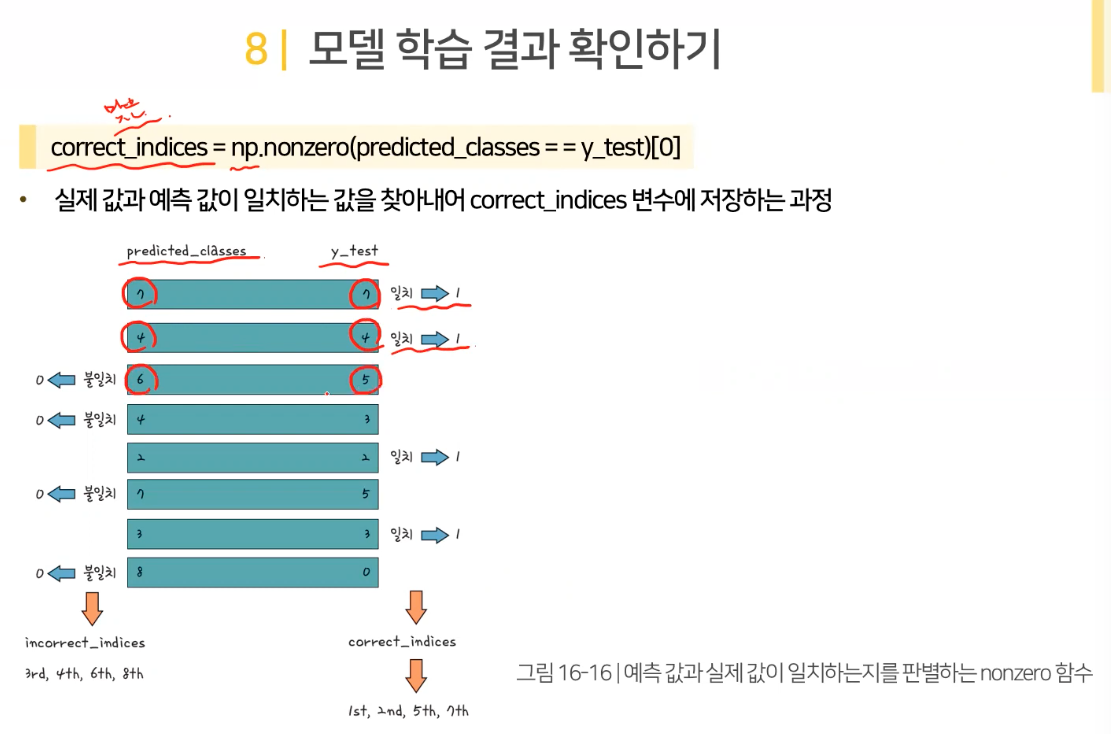

In [ ]:
# 모델 학습 결과 확인하기
predicted_classes = np.argmax(model.predict(X_test), axis=1)

# (==) 같으면 1(참), np.nonzero는 1을 찾아내는 함수, 데이터의 위치를 알아냄 
correct_indices = np.nonzero(predicted_classes==y_test)[0]
incorrect_indices = np.nonzero(predicted_classes!=y_test)[0]

In [ ]:
len(incorrect_indices)

191

In [ ]:
incorrect_indices

array([ 115,  151,  247,  274,  321,  445,  495,  582,  619,  659,  691,
        707,  720,  877,  882,  951, 1014, 1039, 1044, 1112, 1156, 1178,
       1182, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1328, 1393, 1395,
       1414, 1422, 1444, 1494, 1522, 1530, 1549, 1611, 1621, 1642, 1681,
       1709, 1748, 1751, 1790, 1828, 1901, 1913, 1941, 1982, 2004, 2044,
       2053, 2098, 2109, 2118, 2130, 2135, 2185, 2272, 2293, 2299, 2387,
       2422, 2426, 2488, 2597, 2610, 2618, 2648, 2654, 2720, 2742, 2758,
       2771, 2810, 2877, 2921, 2927, 2939, 2953, 2995, 3030, 3062, 3073,
       3117, 3266, 3289, 3375, 3405, 3503, 3520, 3558, 3597, 3662, 3681,
       3727, 3796, 3808, 3853, 3876, 3906, 3941, 3943, 3976, 3985, 4065,
       4078, 4163, 4176, 4199, 4201, 4224, 4248, 4294, 4369, 4370, 4497,
       4536, 4635, 4639, 4740, 4761, 4807, 4814, 4823, 4880, 4943, 4966,
       5046, 5054, 5078, 5138, 5140, 5457, 5642, 5676, 5734, 5842, 5936,
       5955, 5973, 6011, 6023, 6174, 6555, 6571, 65

In [ ]:
len(np.nonzero(predicted_classes!=y_test)[0])

191

## UNIT 17-1 전염병 예측 인공지능 만들기
> https://www.youtube.com/watch?v=IUnM5D11fso&list=PLa9dKeCAyr7iXpGqNHKXmeqB6LLo7ieS9&index=39&ab_channel=%EA%B8%B8%EB%B2%97IT%EC%A0%84%EB%AC%B8%EC%84%9C%28%EC%97%85%EB%A1%9C%EB%93%9C%EC%A4%91%EB%8B%A8%2C%EA%B5%AC%EA%B3%84%EC%A0%95%29

In [ ]:
from keras.models import Sequential

# 순환 신경망(RNN) 기법에는 LSTM, GRU 등 다양한 기법이 있는데, SimpleRNN은 더 발전됨
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [ ]:
!git clone http://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
dataset=dataframe.values
dataset=dataset.astype('float32')

Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


### 데이터 정규화 및 분류하기
- 인공지능 모델의 성능을 높이려면 데이터 정규화가 필요

> https://www.youtube.com/watch?v=TDS5FKqPNU8&list=PLa9dKeCAyr7iXpGqNHKXmeqB6LLo7ieS9&index=40&ab_channel=%EA%B8%B8%EB%B2%97IT%EC%A0%84%EB%AC%B8%EC%84%9C%28%EC%97%85%EB%A1%9C%EB%93%9C%EC%A4%91%EB%8B%A8%2C%EA%B5%AC%EA%B3%84%EC%A0%95%29

In [ ]:
# 정규화하는 범위를 0~1사이의 값으로 결정(other ex: (-1,1))
scaler = MinMaxScaler(feature_range=(0,1))
Dataset = scaler.fit_transform(dataset)
# shuuffle = False 데이터 섞지 않음
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


In [ ]:
 # 데이터 형태 변경하기

 def create_dataset(dataset, look_back):
    x_data = []
    y_data = []
    for i in range(len(dataset)-look_back):
        data = dataset[i:(i+look_back), 0] # 0번째 열
        x_data.append(data)
        y_data.append(dataset[i+look_back, 0])
    # 최종적으로 변환된 x_data와 y_data를 모델에서 계산을 쉽게 하도록 넘파이 배열로 바꿔준다.
    return np.array(x_data), np.array(y_data)

In [ ]:
a = [2,5,8,9,11]
print(a)
print(np.array(a))

[2, 5, 8, 9, 11]
[ 2  5  8  9 11]


In [ ]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(86, 3) (86,)
(20, 3) (20,)


## UNIT 17-6 전염병 예측 인공지능 만들기 (인공지능 모델에 넣어줄 형태로 변환하기)

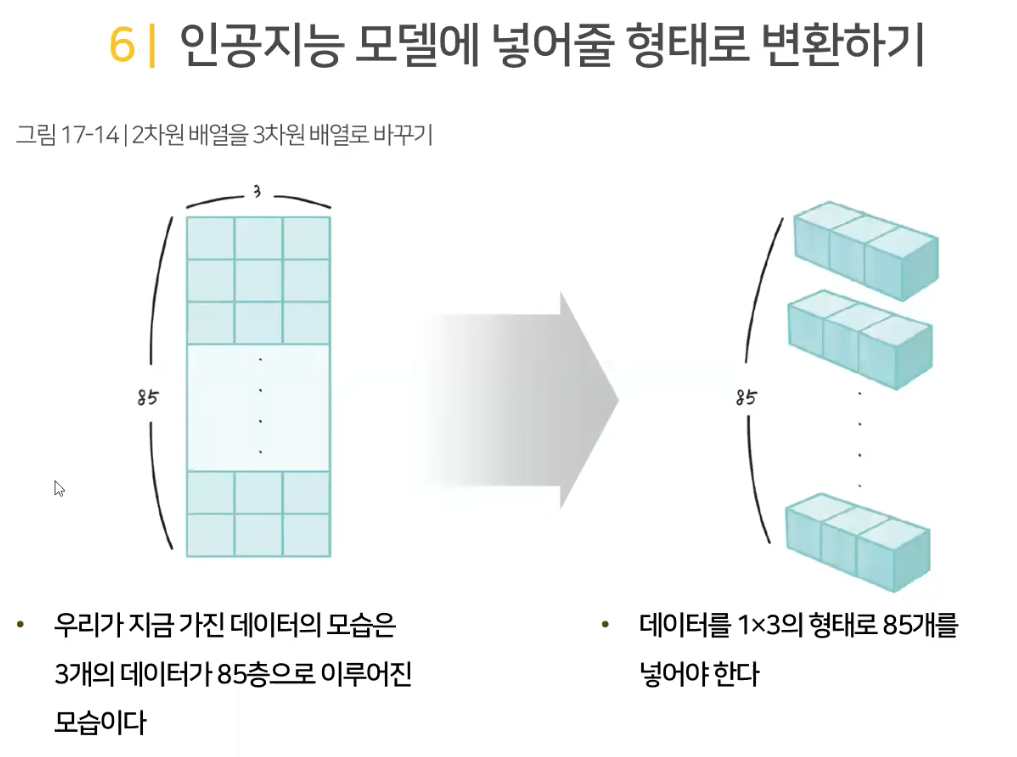

In [ ]:
X_train=np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test=np.reshape(x_test,(x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(86, 1, 3)
(20, 1, 3)


## 인공지능 모델 만들기

In [ ]:
model = Sequential()
# 변환한 데이터 형태인 (1, 3)
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 21        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습시키기

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 1ms/step - loss: 0.0887
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 4/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 6/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 7/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 8/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 9/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 10/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 11/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 12/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 13/100
86/86 [=================

## UNIT 17-8 전염병 예측 인공지능 만들기 (모델 학습시키기, 데이터 예측하기)

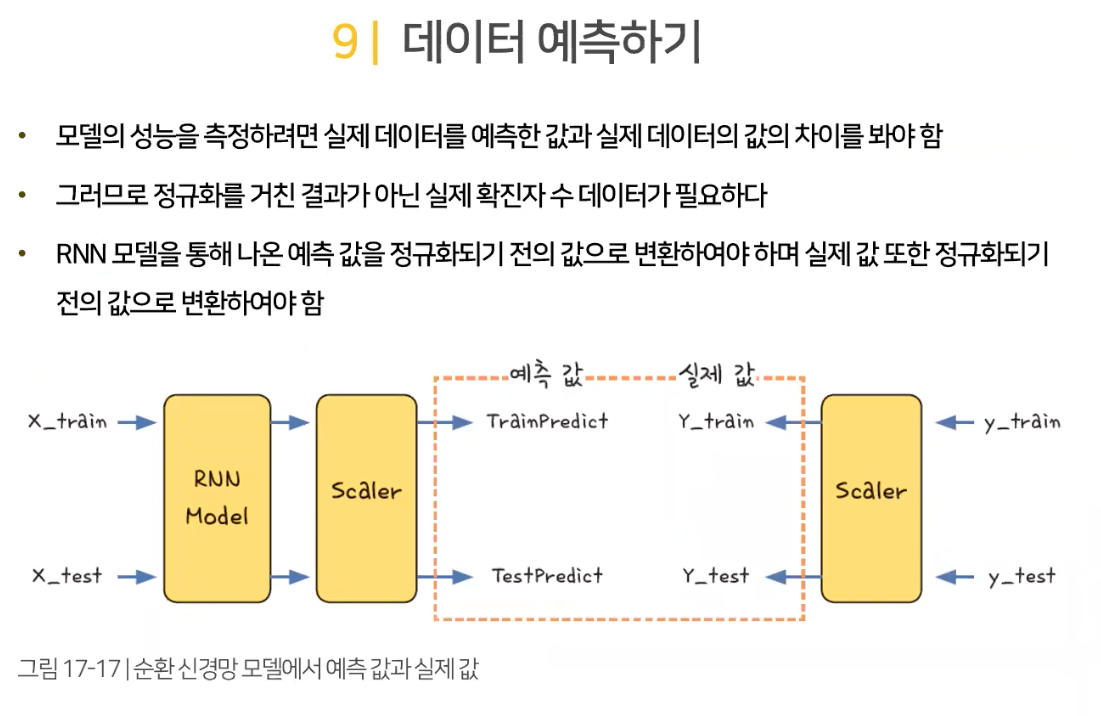

> https://www.youtube.com/watch?v=YeEizm8Qnxs&list=PLa9dKeCAyr7iXpGqNHKXmeqB6LLo7ieS9&index=45&ab_channel=%EA%B8%B8%EB%B2%97IT%EC%A0%84%EB%AC%B8%EC%84%9C%28%EC%97%85%EB%A1%9C%EB%93%9C%EC%A4%91%EB%8B%A8%2C%EA%B5%AC%EA%B3%84%EC%A0%95%29

In [ ]:
 trainPredict = model.predict(X_train)
 testPredict = model.predict(X_test)
 
 TrainPredict = scaler.inverse_transform(trainPredict)
 Y_train = scaler.inverse_transform([y_train])

 TestPredict = scaler.inverse_transform(testPredict)
 Y_test = scaler.inverse_transform([y_test])

In [ ]:
print(testPredict)

[[0.93380874]
 [0.9338812 ]
 [0.9343187 ]
 [0.93512934]
 [0.93708074]
 [0.939111  ]
 [0.9405801 ]
 [0.94199765]
 [0.94369084]
 [0.9453157 ]
 [0.9464002 ]
 [0.9471086 ]
 [0.9477638 ]
 [0.9484648 ]
 [0.9503436 ]
 [0.95088255]
 [0.95191854]
 [0.95323265]
 [0.95465326]
 [0.9552867 ]]


In [ ]:
# 모델의 정확도 살펴보기

# Y_train[0] 실제 정답값 전체 / TrainPredict[:,0] 예측값 전체
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('TrainScore : %.2fRMSE'%(trainScore))

testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('TestScore : %.2fRMSE'%(testScore))

TrainScore : 219.11RMSE
TestScore : 364.36RMSE


## Unit 17 전염병 예측 인공지능 만들기10 (결과를 그래프로 확인하기)
> https://www.youtube.com/watch?v=h_v-SMS-Z0Q&list=PLRtkynNyEsXnu5XCR_sd37GQJ3ODlE4bU&index=48&ab_channel=%EA%B8%B8%EB%B2%97_IT%EC%A0%84%EB%AC%B8%EC%84%9C

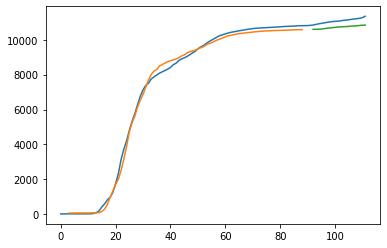

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back)*2: len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Unit 18 - 1 숫자 생성 인공지능 개발 원리
> https://www.youtube.com/watch?v=PLIMEa5wkeA&list=PLRtkynNyEsXnu5XCR_sd37GQJ3ODlE4bU&index=50&ab_channel=%EA%B8%B8%EB%B2%97_IT%EC%A0%84%EB%AC%B8%EC%84%9C

In [ ]:
!pip install tensor

     |████████████████████████████████| 50 kB 2.8 MB/s 
     |████████████████████████████████| 3.1 MB 9.9 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 296 kB 66.1 MB/s 
     |████████████████████████████████| 1.9 MB 59.3 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 251 kB 60.2 MB/s 
     |████████████████████████████████| 74 kB 3.1 MB/s 
  Created wheel for tensor: filename=tensor-0.3.6-py3-none-any.whl size=71568 sha256=7114c5b36a4c8792df1317ba388f07d3a69f47d30b81347ff5696cbf6f5772a1
  Stored in directory: /root/.cache/pip/wheels/66/49/9d/4c43e89065768fec7ab631d87d9ac21d619b6b0b3d45de1714
  Created wheel for construct: filename=construct-2.10.67-py3-none-any.whl size=59053 sha256=03f21687e8ffc8c136aded96313e6520e4e70784180f804c7059c0d15fa56f14
  Stored in directory: /root/.cache/pip/wheels/d1/06/5d/727e9a49d1f306661b

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.layers.advanced_activations import LeakyReLU
#from keras.optimizers import Adam
from keras.datasets import mnist
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = (x_test.astype(np.float32)-127.5)/127.5
mnist_data = x_test.reshape(10000, 784)
print(mnist_data.shape)

(10000, 784)


In [ ]:
def create_generator() :
    generator = Sequential()
    # 100개 필셀은 노이즈값으로, 100개 픽셀값이 랜덤한 값을 가짐
    generator.add(Dense(units=256, input_dim=100))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(units=784, activation='tanh'))
    return generator

g = create_generator()
g.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 784)               402192    
Total params: 559,632
Trainable params: 559,632
Non-trainable params: 0
_________________________________________________________________


## Unit 18- 5 판별자 신경망 만들기
> https://www.youtube.com/watch?v=h-nf8qo9NXs&list=PLRtkynNyEsXnu5XCR_sd37GQJ3ODlE4bU&index=52&ab_channel=%EA%B8%B8%EB%B2%97_IT%EC%A0%84%EB%AC%B8%EC%84%9C

In [ ]:
def create_discriminator():
    discriminator = Sequential()
    # 생성자가 만든 손글씨를 넣기 때문에 28*28
    discriminator.add(Dense(units=512, input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(units=1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer='adam')
    #discriminator.compile(loss='binary_crossentropy', optimizer='adam', (lr=0.0002, beta_1=0.5))
    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_gan(discriminator, generator):
    # 판별자가 학습을 하지 못하도록 막아줌
    discriminator.trainable = False
    # (100,) 값을 비워두면 실제 데이터의 개수(여기에서는 10,000개)를 자동으로 넣어준다.
    gan_input = Input(shape=(100,))
    # 10x10이루어진 픽셀의 10,000개
    x = generator(gan_input)
    # 판별자가 생성자가 만든 그림(x)을 보고 판단한 결과
    gan_output = discriminator(x)
    # input=gan_input은 생성자 신경망이 만든 그림, 출력값은 판별자 신경망이 판단한 결과
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

gan=create_gan(d, g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_12 (Sequential)   (None, 784)               559632    
_________________________________________________________________
sequential_13 (Sequential)   (None, 1)                 533505    
Total params: 1,093,137
Trainable params: 559,632
Non-trainable params: 533,505
_________________________________________________________________


## Unit 18 - 7 결과 확인 함수 만들기
> https://www.youtube.com/watch?v=Xj3tUI5KjJk&list=PLRtkynNyEsXnu5XCR_sd37GQJ3ODlE4bU&index=54&ab_channel=%EA%B8%B8%EB%B2%97_IT%EC%A0%84%EB%AC%B8%EC%84%9C

In [ ]:
def plot_generated_images(generator):
    # loc=0 : 평균이 0 / scale = : 1만큼 떨어진 값 (-1~1) 
    noise = np.random.normal(loc=0, scale=1, size=[100,100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        # 그림 이름을 넣지 않음
        plt.axis('off')
    # 만든 그림을 화면에 보여주는 명령어
    plt.tight_layout()

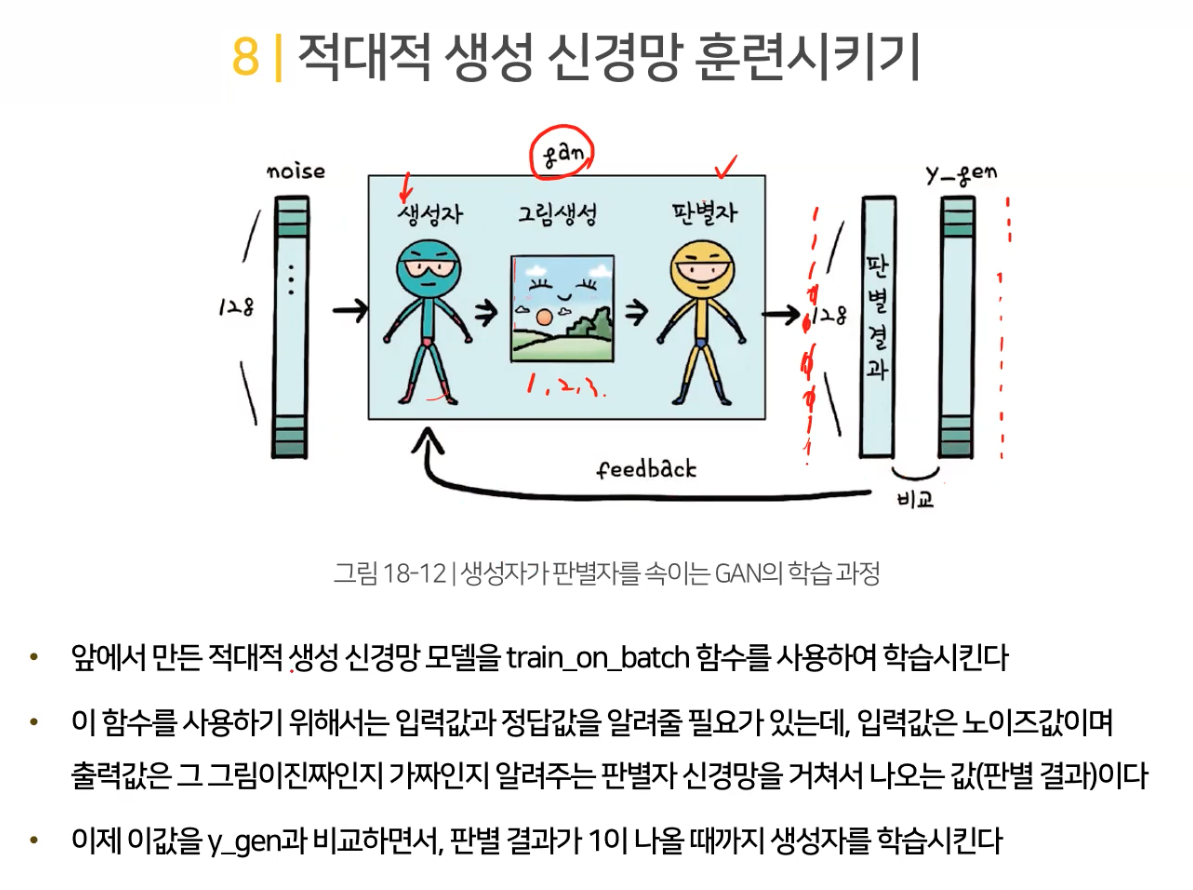

In [ ]:
batch_size=128
epochs=5000
for e in tqdm(range(epochs)):
    noise = np.random.normal(0,1, [batch_size, 100])
    generated_images=g.predict(noise)
    image_batch = mnist_data[np.random.randint(low=0, high=mnist_data.shape[0],size=batch_size)]
    X = np.concatenate([image_batch, generated_images])
    y_dis = np.zeros(2*batch_size)
    # 지도 학습 : 이 값 중 앞의 128개는 실제 값이므로 1을 넣어줌, 처음 나오는 128개는 진짜 그림
    y_dis[:batch_size]=1
    d.trainable=True
    noise = np.random.normal(0,1,[batch_size,100])
    y_gen = np.ones(batch_size)
    d.trainable = False
    gan.train_on_batch(noise, y_gen)
    if e==1 or e%1000 ==0:
        plot_generated_images(g)

NameError: ignored